# Neural Networks Assignment-Fashion MNIST Dataset

In [ ]:
import numpy as np
np.random.seed(23)

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [ ]:
!pip freeze | grep tensorflow

tensorflow==2.17.1
tensorflow-datasets==4.9.7
tensorflow-hub==0.16.1
tensorflow-io-gcs-filesystem==0.37.1
tensorflow-metadata==1.13.1
tensorflow-probability==0.24.0


### Load Dataset- FASHION MNIST
The Fashion MNIST dataset is a collection of grayscale images of clothing and accessories. It's intended to be a drop-in replacement for the classic MNIST dataset, which contains handwritten digits.
Here are some key characteristics:
1.   Images: 70,000 grayscale images in total. The dataset is divided into a training set of 60,000 images and a test set of 10,000 images. Each image is 28x28 pixels.
2.   Categories: 10 different categories of clothing and accessories, such as t-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.
1.   Loading and Preparing Data: Use FASHION MNIST dataset's load_data method to import training and validation sets.
Training data (x_train) are input pixels; y_train are corresponding labels.
Validation data is used to assess model performance on unseen data.


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape


(60000,)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

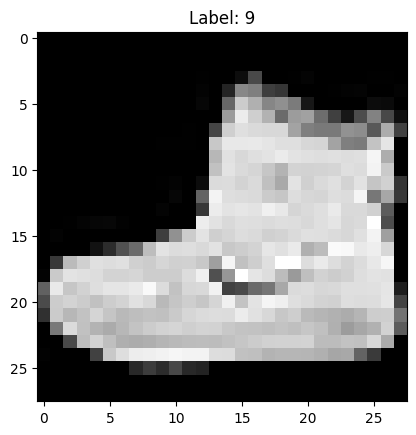

In [ ]:
image_index = 0  # You can change this to any number between 0 and 59999
selected_image = X_train[image_index]
plt.imshow(selected_image, cmap='gray')
plt.title(f'Label: {y_train[image_index]}')
plt.show()

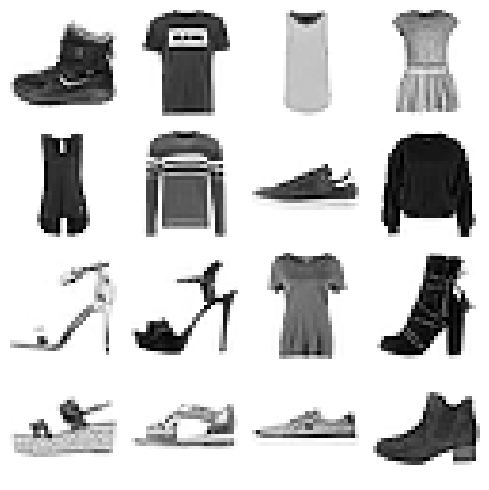

In [ ]:
plt.figure(figsize=(5,5))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
y_train[0:99]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1], dtype=uint8)

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_test[0]

9

### **Preprocess data**

**Preprocessing the Data for the Neural Network**:

Reshape the 28x28 pixel images into 784x1-element arrays(1 dimensional).
Convert the pixel values to 32-bit floats.
Normalize pixel values within the range [0, 1] by dividing by 255.By normalizing our pixel values to within the range [0, 1], the darkest pixels will approach a value of 1, while the white pixels will be represented by 0s.

**Normalization:**
The pixel values in the images are originally integers ranging from 0 to 255. These values are divided by 255 to normalize them to the range [0, 1]. Normalization is a common preprocessing step in deep learning as it helps to stabilize and speed up training by keeping input values small.When converting the pixel values of the FASHION MNIST dataset to be between 0 and 1, these values need to be stored as floating-point numbers (not integers) because the normalized values are decimals. Using float32 allows for proper handling of these normalized values.

**Precision and Efficiency Trade-off:**
Neural networks typically work well with 32-bit floating point numbers (float32), as they provide sufficient precision for the vast majority of machine learning tasks, including deep learning, while being computationally efficient. Using a higher precision (like float64) would increase memory usage and computation time without significantly improving the performance for most tasks.

**Compatibility with TensorFlow/Keras:**
Many deep learning libraries, including TensorFlow and Keras, default to using float32 because it is the most commonly used data type for training models. These libraries are optimized for operations on 32-bit floating-point numbers, ensuring better performance and lower memory consumption.

**Hardware Optimization:**
Many GPUs (used in neural network training) are optimized for float32 calculations, allowing for faster training and inference compared to higher precision data types like float64. Some specialized hardware, such as TPUs, are even more efficient with lower precision data types.

**Consistent Input Scale**: It ensures that the input features (in this case, pixel values) are on a consistent scale, which helps the learning algorithm perform better and converge faster during training.





In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


**Preprocess the labels for the images:**

Since there are ten classes of clothing and accessories, each represented by a digit ranging from 0 through 9, they need to be represented in a format suitable for classification. The integer labels are transformed into a one-hot encoded format using Keras's categorical utility. One-hot encoding converts an integer label into a 10-element array where all elements are 0 except for the index corresponding to the label, which is set to 1. For example, the shoe, which correpsonds to label '9' will be represented as an array where the 9th index is 1, and all other indices are 0. This representation is optimal for classification tasks, as it allows the neural network to output a distinct probability for each class. When the network is given an image of a shoe, the ideal outcome is for it to assign a 100% probability to the '9' class and '0' to all other classes. This desired outcome is what we train the model to achieve through the learning process.

In [ ]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

We already know that X_test[0] is a shoe, and X_train[0] also happened to be a shoe, so we found out that the label digit associated with the shoe is 9. Therefore, seeing that y_test[0] is a binary matrix of zeroes expect for the last index, we can be confident that the one-hot encoding works properly for our code.

#### Design neural network architecture
**Architecture** Consists of 1 input layer, 3 hidden layers, and 1 output layer.

**Input Layer:** Contains 784 input neurons (28x28 pixels flattened).

**Hidden Layers:** Comprise of 3 layers with 64 neurons each that all use sigmoid activation (for now).

**Output Layer:** Consists of 10 neurons (one for each digit), using softmax to output probabilities. The inputs will be fed through 3 hidden layers of 64 sigmoid neurons each, and each of these output layer neurons will generate a probability representing one of the 10 possible digits.

Creating a **Sequential model** in Keras, entails constructing a linear stack of layers.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) #First hidden layer with the input shape specified
model.add(Dense(units=64, activation='sigmoid'))  # Second hidden layer
model.add(Dense(units=64, activation='sigmoid'))   # Third hidden layer
model.add(Dense(units=10, activation='softmax')) # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

With 64 neurons, there are 64 biases. Multiplying 64 by 784 weights, plus the 64 biases, gives us a total of 50,240 parameters for the first layer. For the other two hidden layers, you multiply 64 by 64 and add 64, representing the input from the first and second layer's neurons plus the 64 which is the bias for each layer. The output layer has 64 neurons from the third layer and has 10 neurons within itself. Therefore it will be composed of 650 parameters(64 times 10 weights, plus 10 biases). In total, this amounts to 59,210 parameters.

#### Configure model

**Loss function** = Mean Squared Error    

**Optimizer**: Stochastic Gradient Descent

**Learning Rate**: .01

**Metrics**: Accuracy

Compile the model using the **compile** function

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Training the Model

Train the model using the **fit** function

**Batch Size:**

The batch size refers to the number of training samples used in one forward and backward pass during the training process. Instead of processing the entire dataset at once, the training data is divided into smaller batches, and the model's weights are updated after each batch.

Smaller batch sizes result in more frequent updates to the model, while larger batch sizes may be computationally more efficient but update less frequently.

**Epoch:**

An epoch refers to one complete pass through the entire training dataset. During training, the model will go through multiple epochs, meaning it will see each training sample multiple times.

The more epochs you run, the more opportunities the model has to learn from the data, though too many epochs can lead to overfitting (where the model performs well on the training data but poorly on unseen data).

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0996 - loss: 0.0948 - val_accuracy: 0.1000 - val_loss: 0.0932
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0999 - loss: 0.0930 - val_accuracy: 0.1000 - val_loss: 0.0923
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0998 - loss: 0.0921 - val_accuracy: 0.1000 - val_loss: 0.0917
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0981 - loss: 0.0916 - val_accuracy: 0.0998 - val_loss: 0.0912
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1033 - loss: 0.0912 - val_accuracy: 0.0998 - val_loss: 0.0910
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1032 - loss: 0.0909 - val_accuracy: 0.0994 - val_loss: 0.0907
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0999 - loss: 0.0907 - val_accuracy: 0.0982 - val_loss: 0.0906
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0968 - loss: 0.0905 - val_accu

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3333 - loss: 0.0897


[0.08970123529434204, 0.33570000529289246]

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) #First hidden layer with the input shape specified
model.add(Dense(units=64, activation='relu'))  # Second hidden layer
model.add(Dense(units=64, activation='relu'))   # Third hidden layer
model.add(Dense(units=10, activation='softmax')) # Output layer

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1212 - loss: 0.0899 - val_accuracy: 0.1687 - val_loss: 0.0892
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1888 - loss: 0.0890 - val_accuracy: 0.2484 - val_loss: 0.0883
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2671 - loss: 0.0880 - val_accuracy: 0.3213 - val_loss: 0.0873
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3377 - loss: 0.0870 - val_accuracy: 0.3765 - val_loss: 0.0862
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3910 - loss: 0.0858 - val_accuracy: 0.4201 - val_loss: 0.0848
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4320 - loss: 0.0843 - val_accuracy: 0.4536 - val_loss: 0.0830
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4577 - loss: 0.0824 - val_accuracy: 0.4704 - val_loss: 0.0807
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4791 - loss: 0.0799 - val_accu

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8496 - loss: 0.0221


[0.02280898205935955, 0.8428000211715698]

In [ ]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(784,))) #First hidden layer with the input shape specified
model.add(Dense(units=64, activation='tanh'))  # Second hidden layer
model.add(Dense(units=64, activation='tanh'))   # Third hidden layer
model.add(Dense(units=10, activation='softmax')) # Output layer

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1403 - loss: 0.0904 - val_accuracy: 0.2352 - val_loss: 0.0872
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2540 - loss: 0.0864 - val_accuracy: 0.3136 - val_loss: 0.0836
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3199 - loss: 0.0827 - val_accuracy: 0.3666 - val_loss: 0.0793
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3849 - loss: 0.0782 - val_accuracy: 0.4397 - val_loss: 0.0748
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4618 - loss: 0.0734 - val_accuracy: 0.4998 - val_loss: 0.0703
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5130 - loss: 0.0691 - val_accuracy: 0.5493 - val_loss: 0.0661
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5648 - loss: 0.0648 - val_accuracy: 0.5941 - val_loss: 0.0623
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6012 - loss: 0.0613 - val_accu

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8510 - loss: 0.0219


[0.02238558605313301, 0.8453999757766724]

#### Evaluation of Model outputs with different activation functions

We attempted to create a model using tanh, relu and sigmoid while maintaing all other parameters consistent to get a fair assessment of the impact of changing the activation function on accuracy.
As can be seen from the results above, 'sigmoid' had a remarkably poor accuracy of ~33%, while 'relu' and 'tanh' had much better and similar accuracy results of ~85%. This can be explained by the fact that 'sigmoid' especially in a multi-layer network falls short since its input and output range (0,1) are limited in comparison with relu and tanh. This leads Sigmoid to have a vanishing gradient problem, and has an adverse impact on the backpropagation, which is what the neural network uses to adjust the weights across the layers. Therefore, sigmoid is best served for a binary classification output layer, which is not what we are dealing with in this multi-modal multilayer model.
ReLU and tanh both have wider outputs, so they allow for better expressiveness across the multi-layers and leading to better accuracy. Since the accuracy of both activation fuctions is similar, we can choose either to continue. We will use ReLU is generally more computationally efficient than tanh and the next step will involve increasing neural network complexity, the rest of this project will proceed with optimizing other layers based on the relu activation function.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) #First hidden layer with the input shape specified
model.add(Dense(units=128, activation='relu'))  # Second hidden layer
model.add(Dense(units=64, activation='relu'))   # Third hidden layer
model.add(Dense(units=10, activation='softmax')) # Output layer
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
final_model=model.fit(X_train, y_train, batch_size=64, epochs=250, verbose=1, validation_data=(X_test, y_test))

Epoch 1/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1210 - loss: 0.0899 - val_accuracy: 0.2242 - val_loss: 0.0885
Epoch 2/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2578 - loss: 0.0880 - val_accuracy: 0.3231 - val_loss: 0.0865
Epoch 3/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3398 - loss: 0.0858 - val_accuracy: 0.3487 - val_loss: 0.0835
Epoch 4/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3609 - loss: 0.0824 - val_accuracy: 0.3731 - val_loss: 0.0792
Epoch 5/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3928 - loss: 0.0777 - val_accuracy: 0.4411 - val_loss: 0.0744
Epoch 6/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4681 - loss: 0.0728 - val_accuracy: 0.5388 - val_loss: 0.0686
Epoch 7/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5591 - loss: 0.0666 - val_accuracy: 0.5743 - val_loss: 0.0628
Epoch 8/250
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5858 - loss: 0.0609 - val_accu

### Accuracy Results and Further Analysis

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8686 - loss: 0.0195


[0.020038094371557236, 0.8640000224113464]

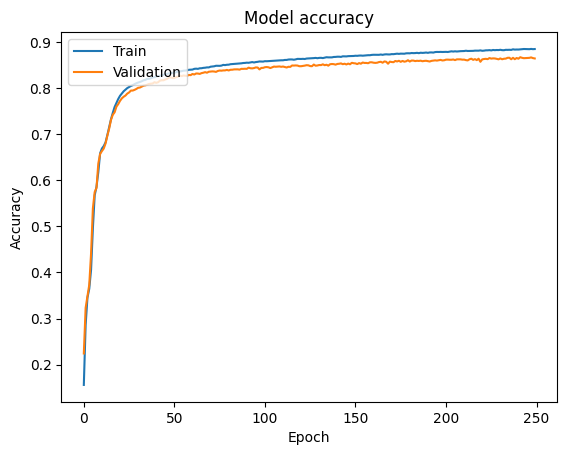

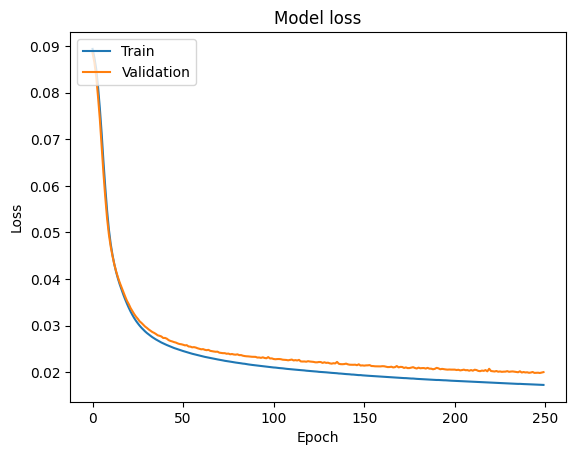

In [ ]:
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As we can see, the implementation of paramater optimization steps:
1.   Increasing the number of neurons for the second layer from 64 to 128
2.   Increasing the number of epochs from 200 to 250
2.   Reducing the batch size from 128 to 64

led to an overall increase in accuracy from ~85 to 86%. However, we notice that the model has a widening gap between training data and validation data as the number of epochs keeps increasing. This differenation indicates that we are likely slightly overfitting the model and that there are potentially better ways to increasing accuracy, such as further reducing the batch size to increase noise and help ensure that the model escapes local minima. However, the results from this model are considered satisfactory for this project.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


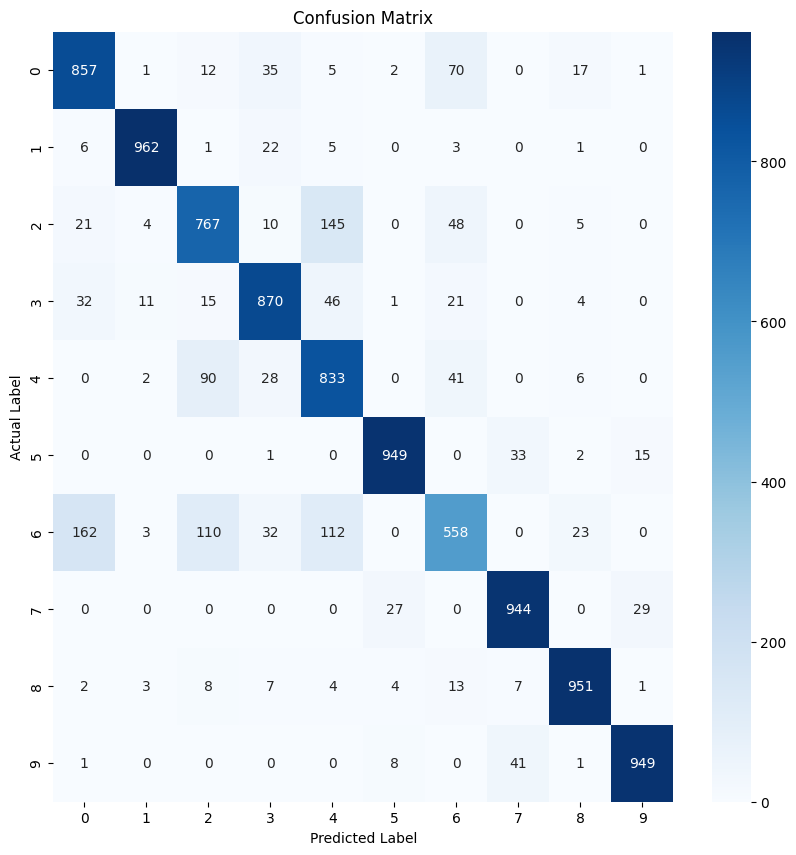

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

The confusion matrix highlights an interesting observation that label 6 is the most error prone by a wide margin, and it seems to be most confused with labels 0,2 and 4 so we did a bit of a deeper dive into it below.

#### All categories in the FASHION MINST Dataset
Label	|| Description

* 0	|| T-shirt/top
* 1	|| Trouser
* 2	|| Pullover
* 3	|| Dress
* 4	|| Coat
* 5	|| Sandal
* 6	|| Shirt
* 7	|| Sneaker
* 8	|| Bag
* 9	|| Ankle boot

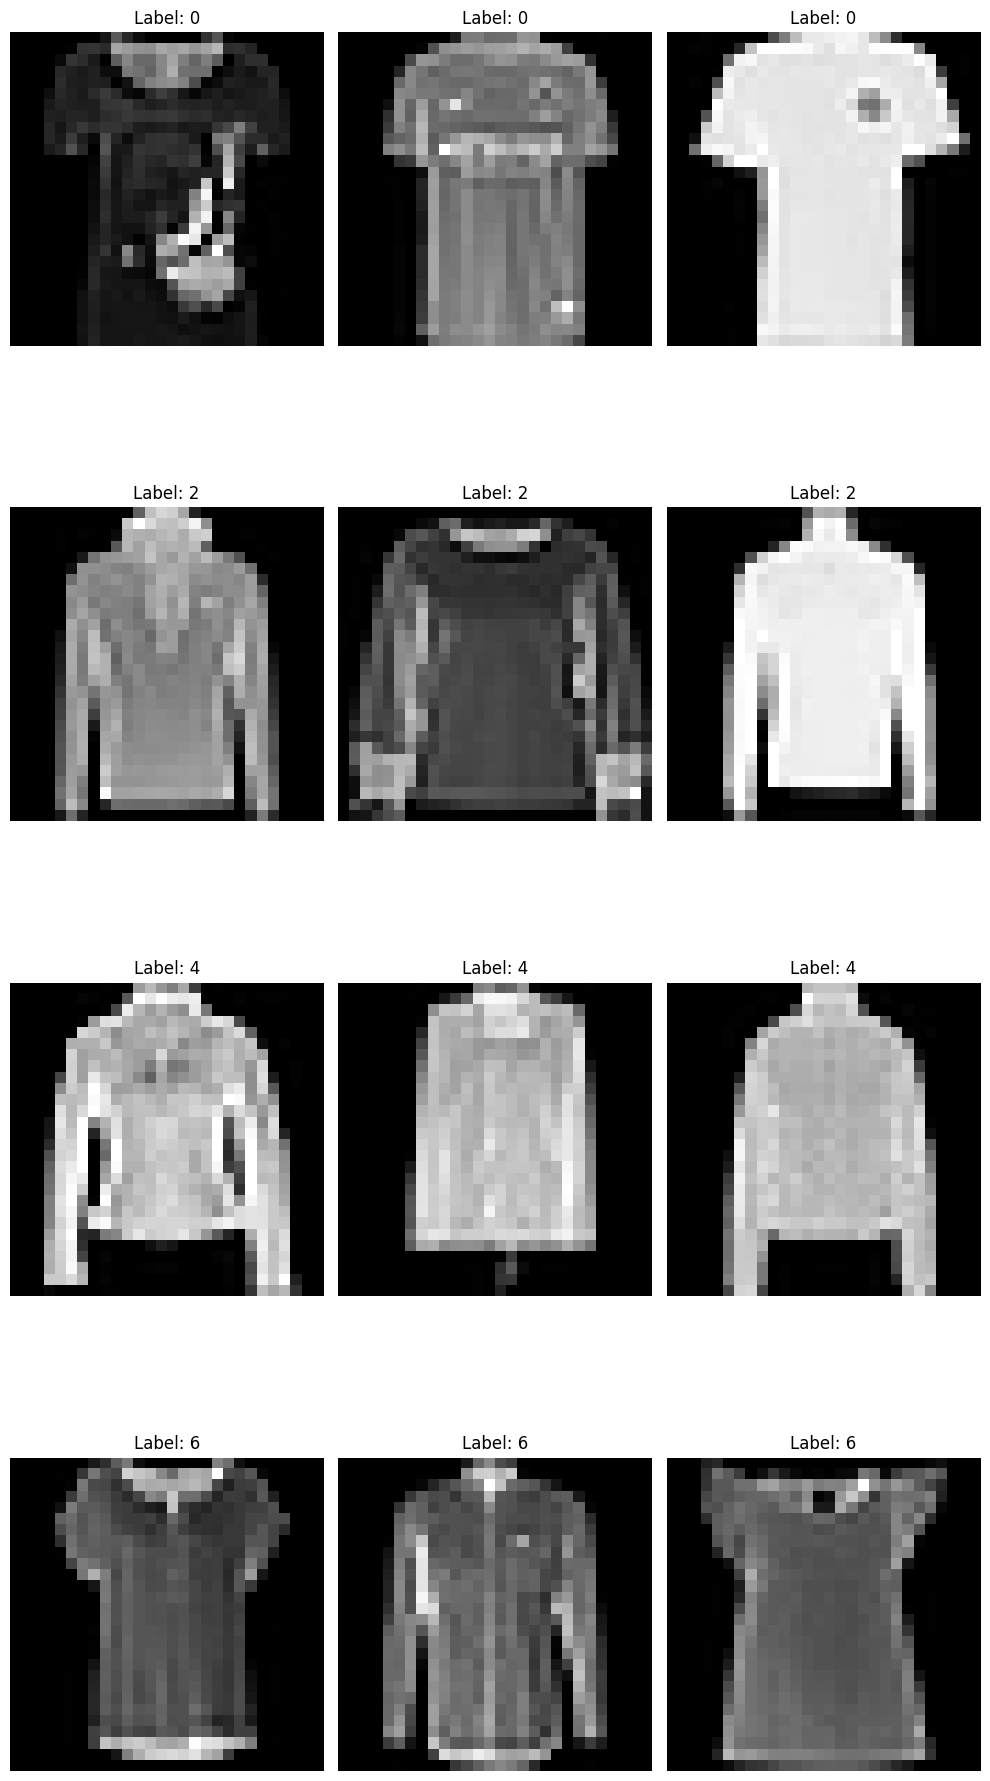

In [ ]:
# Reloading the Fashion MNIST dataset to get pre-processed data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Function to display images for specific labels
def display_images_for_labels(labels, num_images=3):
    """Displays images for the specified labels from the Fashion MNIST dataset.

    Args:
        labels: A list of label values to display images for.
        num_images: The number of images to display for each label.
    """
    fig, axes = plt.subplots(len(labels), num_images, figsize=(10, 5 * len(labels)))

    for row, label in enumerate(labels):
        # Find indices of images with the current label
        indices = np.where(y_train == label)[0]

        # Select a random sample of images
        selected_indices = np.random.choice(indices, size=num_images, replace=False)

        for col, index in enumerate(selected_indices):
            # Display the image
            axes[row, col].imshow(X_train[index], cmap='gray')
            axes[row, col].set_title(f'Label: {label}')
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Display images for labels 0, 2, 4, and 6
display_images_for_labels([0,2,4,6])


#### Deeper Dive Outcomes
The description of the labels, as well as the images highlight why this model has limitations. Label 6 is simply called a shirt, which is not very specific in relation to some of the other categories therefore it is easy, even for the naked eye, to miss classify these items. Even the images reflect this as well, since label 6 seems to have the biggest variety alternating long-sleeve, short-sleeve, formal casual etc.

Per literature, there are ways to circumvent the accuracy issues faced here and achieve a near perfect accuracy.
Some work that can be done is using CNN Models.As well as techniques that involve, data augmentation could also be attempted, such as scaling/flipping/cropping which would allow the model to better generalize to unseen data.
Regularization could be attempted as well, such as L2 regularization or adding more dropout layers. But for common architectures model like the ones used here and with the computational limitations that were faced, the results are satisfactory.